In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data.txt", sep=",")
df = df.dropna().reset_index(drop=True) #drop missing value (NaN) rows
df.head()

,Choices,Rewards
0,3.0,5.0
1,4.0,10.0
2,2.0,0.0
3,1.0,0.0
4,4.0,10.0


## Question 1 Part A
### Update V(s) for each trial with Rescorla-Wagner learning rule and plot values.

In [3]:
def r_w_rule(df, learning_rate):
    
    #initialize V(s) for each stimulus as 0
    values = {}
    for s in set(df['Choices']): 
        values[s] = [0]
    
    #Note: for each stimulus I use a list featuring all the old values, so I can plot them. 
    #At each trial, the latest value in the list is the current V(s).
    
    #loop through each trial and update V(s)
    for trial in range(len(df)): 
        obtained_reward = df['Rewards'][trial]
        s = df['Choices'][trial]
        
        V_old = values[s][-1] #index of -1 uses the very last entry in the list
        prediction_error = obtained_reward - V_old
        
        V_new = V_old + (learning_rate*prediction_error)
        
        values[s].append(V_new)
        
        #just for the plot: for the other stimuli, adds the last value of the list again
        for stimulus in set(df['Choices']):
            if stimulus != s:
                values[stimulus].append(values[stimulus][-1])
                
    return values

In [4]:
values_history = r_w_rule(df, learning_rate=0.2)

### Plot V(s) as it changes over the trials

In [5]:
def plot_learning(df, values_history):
    trials = range(len(df)+1) #add 1 because of indexing at 0

    for stimulus in range(1,5): 
        plt.plot(trials, values_history[stimulus], label = "Stim {}".format(stimulus))
    
    plt.xlabel('Trials')
    plt.ylabel('V(s)')
    plt.legend()
    plt.show()

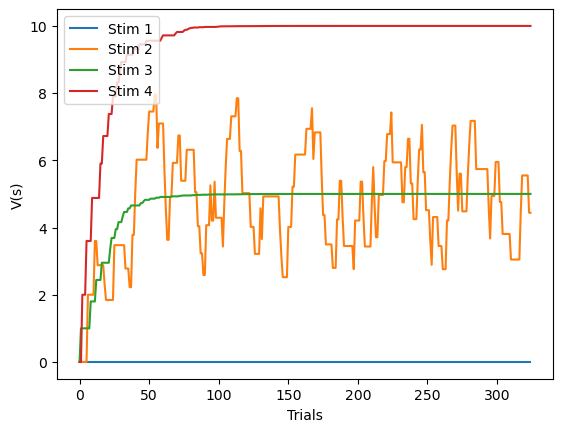

In [6]:
plot_learning(df, values_history)

## Question 1 Part B
### Rewrite the function to allow for different positive and negative learning rates.

In [8]:
def r_w_rule_asymmetrical(df, pos_learning_rate, neg_learning_rate):
    
    #initialize V(s) for each stimulus as 0
    values = {}
    for s in set(df['Choices']): 
        values[s] = [0]
    
    #Note: for each stimulus I use a list featuring all the old values, so I can plot them. 
    #At each trial, the latest value in the list is the current V(s).
    
    #loop through each trial and update V(s)
    for trial in range(len(df)): 
        obtained_reward = df['Rewards'][trial]
        s = df['Choices'][trial]
        
        V_old = values[s][-1] #index of -1 uses the very last entry in the list
        prediction_error = obtained_reward - V_old
        
        #select different learning rate depending on pos or neg PE
        if prediction_error >= 0:
            learning_rate = pos_learning_rate
        else:
            learning_rate = neg_learning_rate
        
        V_new = V_old + (learning_rate*prediction_error)
        
        values[s].append(V_new)
        
        #just for the plot: for each stimulus, adds the last value of the list again
        for stimulus in set(df['Choices']):
            if stimulus != s:
                values[stimulus].append(values[stimulus][-1])
                
    return values

### Lets look at what happens when $\eta^{+}>\eta^{-}$

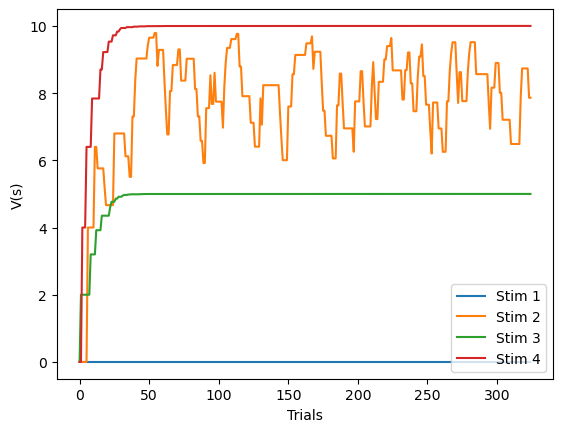

In [9]:
values_history_high_pos = r_w_rule_asymmetrical(df, pos_learning_rate=0.4, neg_learning_rate=0.1)
plot_learning(df, values_history_high_pos)

### Now for $\eta^{-}>\eta^{+}$

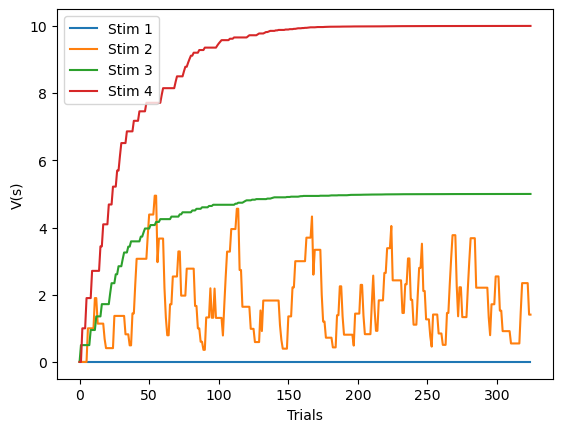

In [10]:
values_history_high_neg = r_w_rule_asymmetrical(df, pos_learning_rate=0.1, neg_learning_rate=0.4)
plot_learning(df, values_history_high_neg)

For each of the cues with deterministic payoff, only the positive learning rate value has an affect. Thus, the graphs show the number of trials it takes to learning V(s) close to the true value of those cues modulated by the positive learning rate. 

These plots show something more interesting when considering the risky payoff (either 0 or 10 cents; yellow line), as the asymmetrical learning rate heavily impacts the (average) value of the that stimulus. It is higher when $\eta^{+}>\eta^{-}$, and lower when $\eta^{-}>\eta^{+}$

## Question 1 Part C
These results indicate that risk sensitivity can be modulated by the asymmetry of one's learning rate. The value of the "risky" stimulus (the 0 or 10 cents stimulus) is higher than the other "safe" stimulus when $\eta^{+}>\eta^{-}$. This is because obtaining a positive PE updates V(risky stimulus) for this stimulus heavily (in the positive direction), but the negative PE's have little impact on it. Alternatively, this pattern is reversed when $\eta^{-}>\eta^{+}$. In this case, the negative PE's are having a stronger effect on one's learning, and the average value of that stimulus is brought down (beyond it's true value).

Because the value of this stimulus will influence people's choice of it, people would be more *risk-sensitive* when they are more strongly influenced by negative PE's (when $\eta^{-}>\eta^{+}$).

## Question 2

I will keep reffering to these as the safe (0.01 every time) and risky (0 or 1 rarely) stimuli.

If people actually take the highest value action, then, once V(safe stimulus) > V(risky stimulus), people would not stop choosing the safe stimulus. Even if they get a high reward for the risky stimulus initially, the value will not stay high, and it will decay as they continue selecting that stimulus. They may recieve more $1 payoffs to keep the value high, but at some point V(risky stimulus) will probably decay lower than V(safe stimulus), and then they will only select the safe stimulus.  

If there was a bit of schocasticity or exploration in people's choices, it would circumvent getting "stuck" in a cycle of only selecting the safe stimulus. I would then expect people to select the risky stimulus a bit more often (though not as often as the safe stimulus). Since the payoffs are about equal in the long run, the more exploratory a person is, the closer they will converge to selecting the stimuli mostly equally.

## Question 3

Again, if only the highest V(s) is selected, once V(safe stimulus) is > V(risky stimulus), people would not stop choosing the safe stimulus. But, if people do get a high reward for the risky stimulus, even though this value will decay, this decay will be slower, as the payoffs are more frequent. This makes it more likely that V(risky stimulus) will stay high, and people will select it more often. This probability increases greatly with the frequency of the payoffs for the risky stimulus. Thus, with very frequent $1 payoffs (e.g., 50% of the time), then V(risky stimulus) is extremely likely to stay high.

Again, if there was exploration in people's choices, they are bound to select the "risky" stimulus more often, since it would deal out more payoffs in the long run.